In [18]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

sns.set()
%matplotlib inline

In [19]:
df = pd.read_csv('cumulative.csv', sep=',')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [20]:
df.shape

(9564, 50)

In [13]:
features = df.columns
features = list(features)

ValueError: could not convert string to float: 'CONFIRMED'

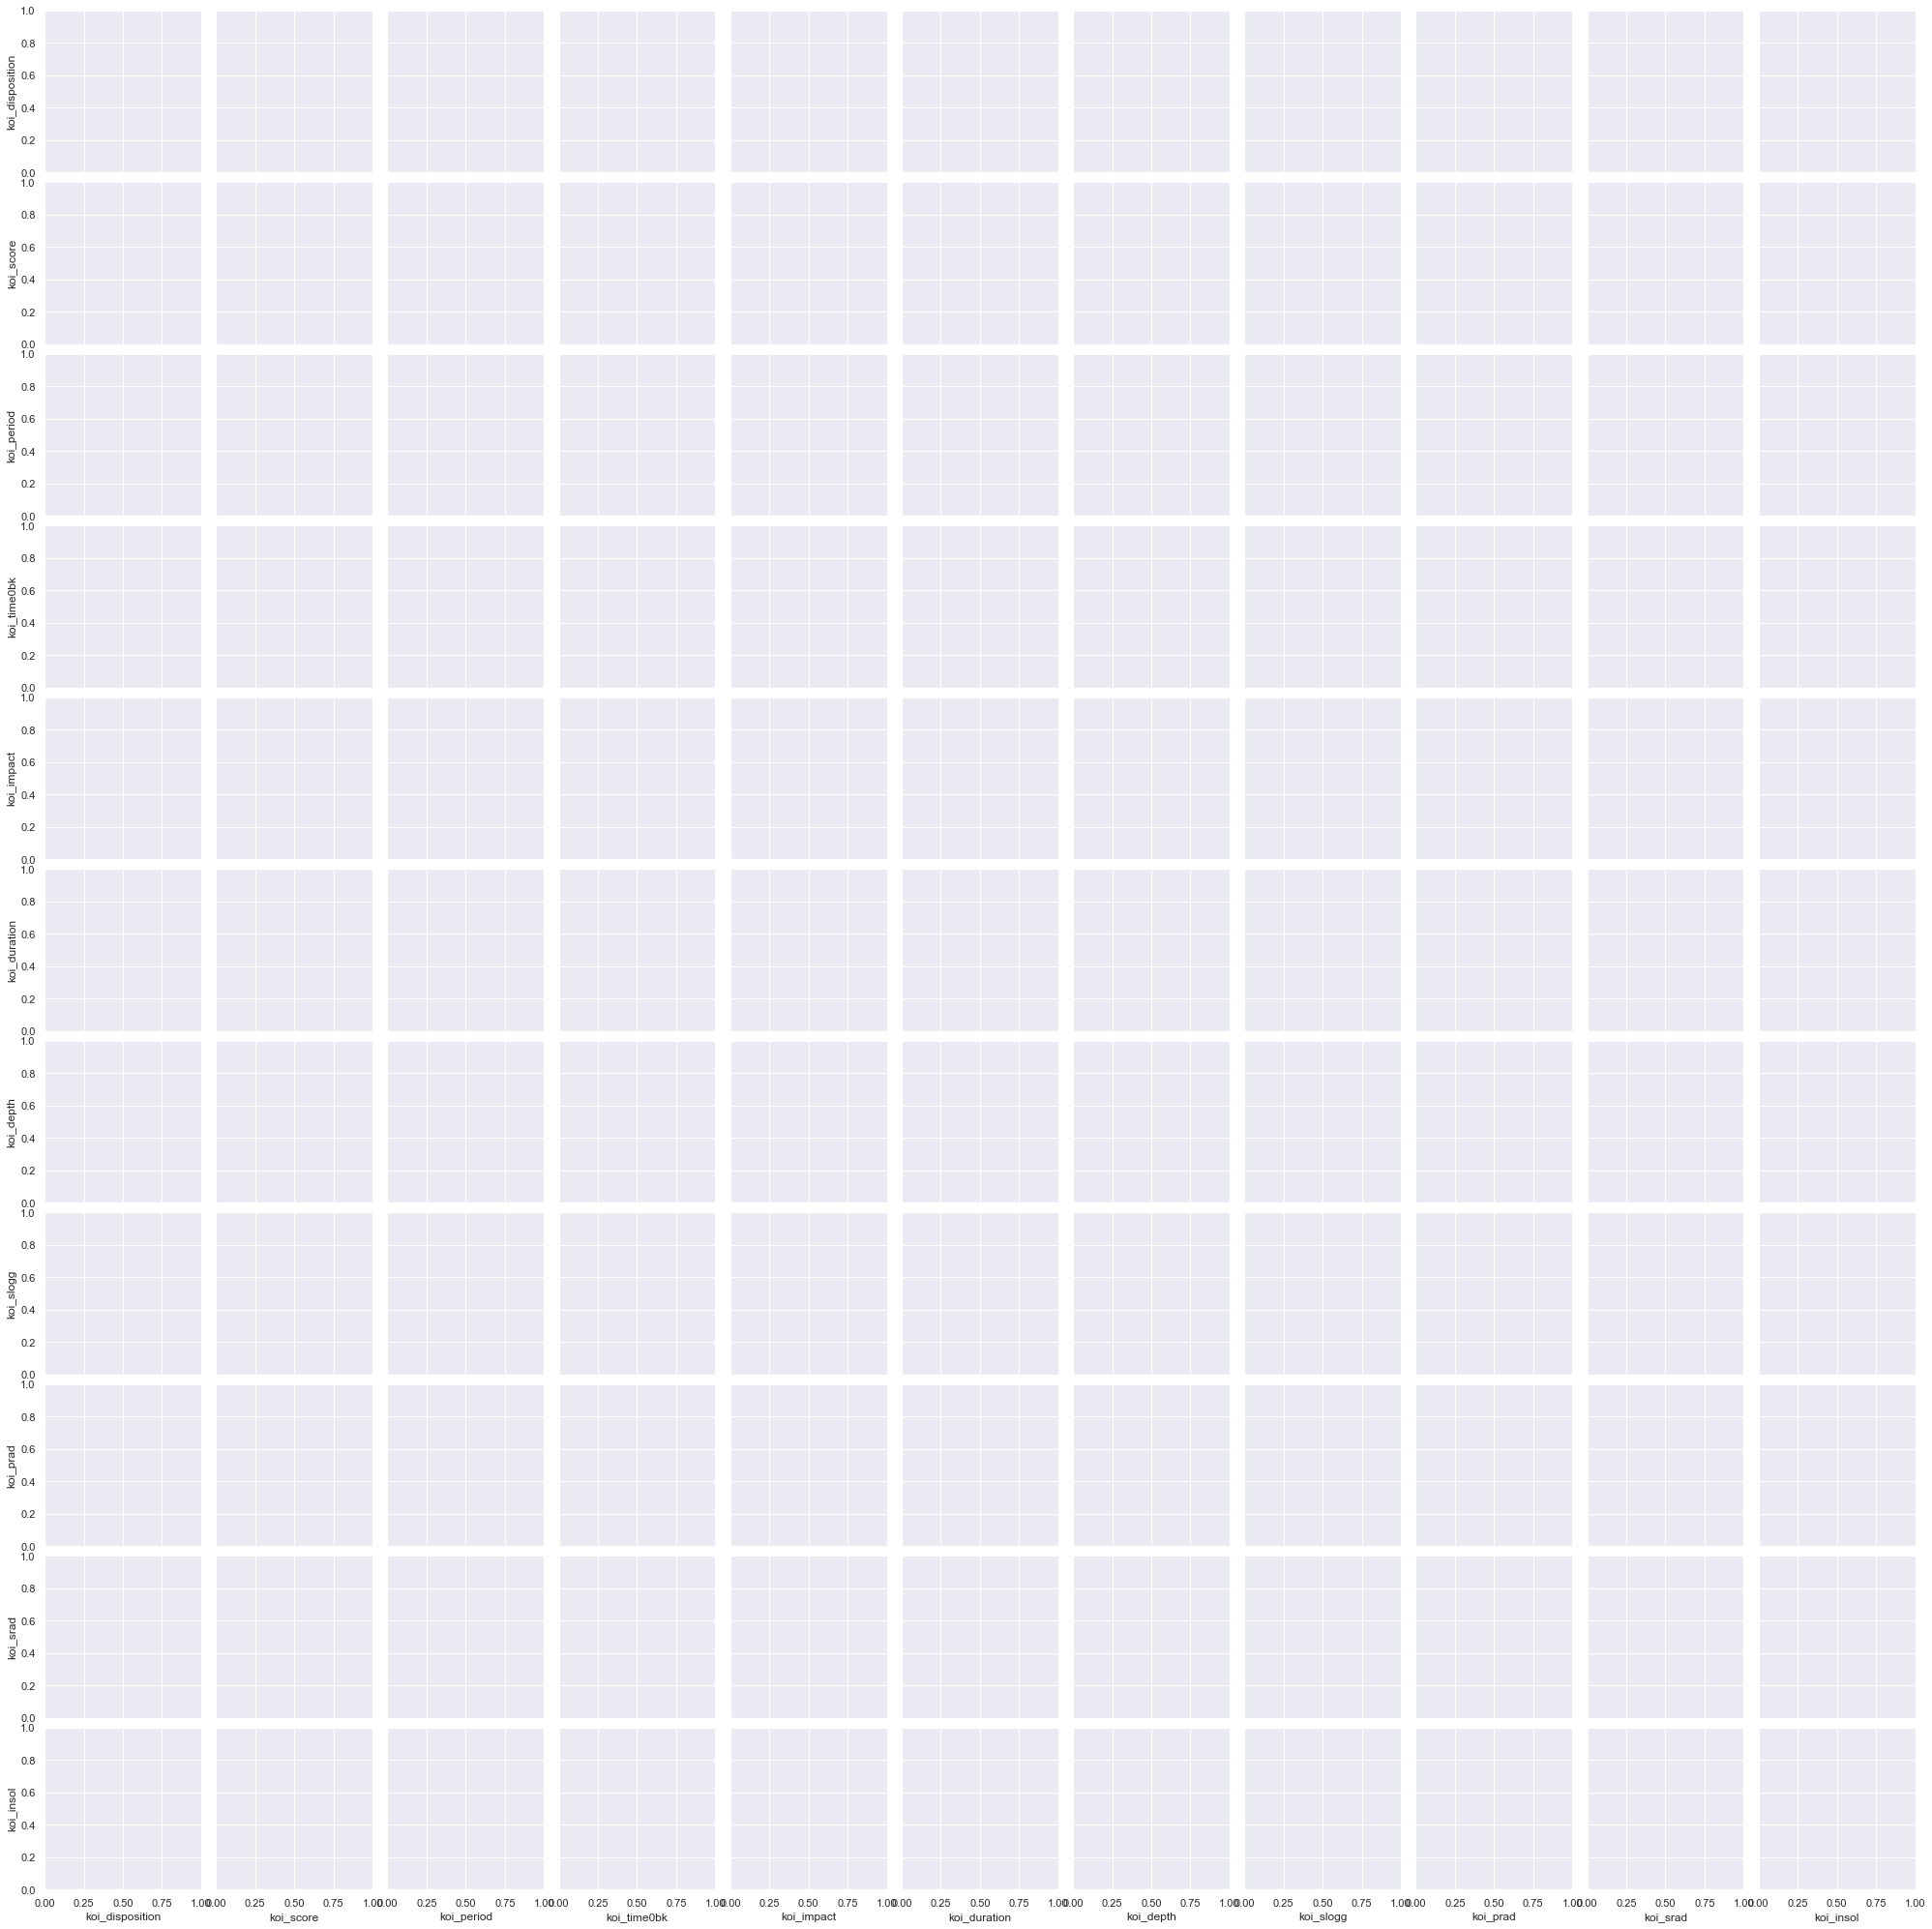

In [24]:
sns.pairplot(
    df,
    hue="koi_disposition",
    x_vars=["koi_disposition", "koi_score", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth",  "koi_slogg", "koi_prad", "koi_srad", "koi_insol"],
    y_vars=["koi_disposition", "koi_score", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth",  "koi_slogg", "koi_prad", "koi_srad", "koi_insol"]
)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [5]:
df = df.drop(['rowid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_tce_delivname'], 1)
df.head()

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
df.shape

(9564, 44)

In [7]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [8]:
df.shape

(9564, 44)

In [9]:
df.drop(df[df['koi_disposition'] == 'CANDIDATE'].index, inplace = True)
df.shape

(7316, 44)

In [10]:
df = pd.get_dummies(df, 'koi_disposition', drop_first=True)
df.rename(columns = {'koi_disposition_FALSE POSITIVE':'koi_false_positive'}, inplace = True)
df.head()

,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_false_positive
0,10797460,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,10797460,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
2,10811496,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1
4,10854555,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

kepid                    0
koi_fpflag_nt            0
koi_fpflag_ss            0
koi_fpflag_co            0
koi_fpflag_ec            0
koi_period               0
koi_period_err1        377
koi_period_err2        377
koi_time0bk              0
koi_time0bk_err1       377
koi_time0bk_err2       377
koi_impact             300
koi_impact_err1        377
koi_impact_err2        377
koi_duration             0
koi_duration_err1      377
koi_duration_err2      377
koi_depth              300
koi_depth_err1         377
koi_depth_err2         377
koi_prad               300
koi_prad_err1          300
koi_prad_err2          300
koi_teq                300
koi_teq_err1          7316
koi_teq_err2          7316
koi_insol              259
koi_insol_err1         259
koi_insol_err2         259
koi_model_snr          300
koi_tce_plnt_num       279
koi_steff              300
koi_steff_err1         397
koi_steff_err2         412
koi_slogg              300
koi_slogg_err1         397
koi_slogg_err2         397
k

In [13]:
df = df.drop(['koi_teq_err1', 'koi_teq_err2'], 1)
df.head()

,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_false_positive
0,10797460,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,10797460,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
2,10811496,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1
4,10854555,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0


In [14]:
cond = df['koi_false_positive'] == 1
df[cond].isnull().sum()

kepid                   0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       376
koi_period_err2       376
koi_time0bk             0
koi_time0bk_err1      376
koi_time0bk_err2      376
koi_impact            299
koi_impact_err1       376
koi_impact_err2       376
koi_duration            0
koi_duration_err1     376
koi_duration_err2     376
koi_depth             299
koi_depth_err1        376
koi_depth_err2        376
koi_prad              299
koi_prad_err1         299
koi_prad_err2         299
koi_teq               299
koi_insol             258
koi_insol_err1        258
koi_insol_err2        258
koi_model_snr         299
koi_tce_plnt_num      271
koi_steff             299
koi_steff_err1        396
koi_steff_err2        398
koi_slogg             299
koi_slogg_err1        396
koi_slogg_err2        396
koi_srad              299
koi_srad_err1         396
koi_srad_err2         396
ra          

In [15]:
c1 = df['koi_false_positive'] == 0
df[c1].isnull().sum()

kepid                  0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1        1
koi_period_err2        1
koi_time0bk            0
koi_time0bk_err1       1
koi_time0bk_err2       1
koi_impact             1
koi_impact_err1        1
koi_impact_err2        1
koi_duration           0
koi_duration_err1      1
koi_duration_err2      1
koi_depth              1
koi_depth_err1         1
koi_depth_err2         1
koi_prad               1
koi_prad_err1          1
koi_prad_err2          1
koi_teq                1
koi_insol              1
koi_insol_err1         1
koi_insol_err2         1
koi_model_snr          1
koi_tce_plnt_num       8
koi_steff              1
koi_steff_err1         1
koi_steff_err2        14
koi_slogg              1
koi_slogg_err1         1
koi_slogg_err2         1
koi_srad               1
koi_srad_err1          1
koi_srad_err2          1
ra                     0
dec                    0


In [16]:
c1 = df['koi_false_positive'] == 0
c2 = df['koi_period_err1'].isna()
df[c1 & c2].isnull().sum()

kepid                 0
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_period            0
koi_period_err1       1
koi_period_err2       1
koi_time0bk           0
koi_time0bk_err1      1
koi_time0bk_err2      1
koi_impact            1
koi_impact_err1       1
koi_impact_err2       1
koi_duration          0
koi_duration_err1     1
koi_duration_err2     1
koi_depth             1
koi_depth_err1        1
koi_depth_err2        1
koi_prad              1
koi_prad_err1         1
koi_prad_err2         1
koi_teq               1
koi_insol             1
koi_insol_err1        1
koi_insol_err2        1
koi_model_snr         1
koi_tce_plnt_num      1
koi_steff             1
koi_steff_err1        1
koi_steff_err2        1
koi_slogg             1
koi_slogg_err1        1
koi_slogg_err2        1
koi_srad              1
koi_srad_err1         1
koi_srad_err2         1
ra                    0
dec                   0
koi_kepmag            0
koi_false_positi

In [17]:
c1 = df['koi_false_positive'] == 0
c2 = df['koi_period_err1'].isna()
df[c1 & c2]

,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_false_positive
2183,8478994,0,0,0,0,51.206903,NaN,NaN,195.7303,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,284.05954,44.518215,9.705,0


In [18]:
df = df.dropna()
df.shape

(6630, 42)

In [19]:
df.isnull().sum()

kepid                 0
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_period            0
koi_period_err1       0
koi_period_err2       0
koi_time0bk           0
koi_time0bk_err1      0
koi_time0bk_err2      0
koi_impact            0
koi_impact_err1       0
koi_impact_err2       0
koi_duration          0
koi_duration_err1     0
koi_duration_err2     0
koi_depth             0
koi_depth_err1        0
koi_depth_err2        0
koi_prad              0
koi_prad_err1         0
koi_prad_err2         0
koi_teq               0
koi_insol             0
koi_insol_err1        0
koi_insol_err2        0
koi_model_snr         0
koi_tce_plnt_num      0
koi_steff             0
koi_steff_err1        0
koi_steff_err2        0
koi_slogg             0
koi_slogg_err1        0
koi_slogg_err2        0
koi_srad              0
koi_srad_err1         0
koi_srad_err2         0
ra                    0
dec                   0
koi_kepmag            0
koi_false_positi

In [20]:
df.head()

,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_false_positive
0,10797460,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,10797460,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
2,10811496,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,1
4,10854555,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0


In [21]:
features = df.columns
features = features.delete(0)
features = features.delete(len(features)-1)
print(features)

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [22]:
X = df[features]

y = df['koi_false_positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Length of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Length of our Training data: (5304, 40) 
Length of our Testing data: (1326,)


In [24]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=2)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

Accuracy Score: 0.837104
Precision Score: 0.835560
Recall Score: 0.935558
F1 Score: 0.882736
AUC Score: 0.872049


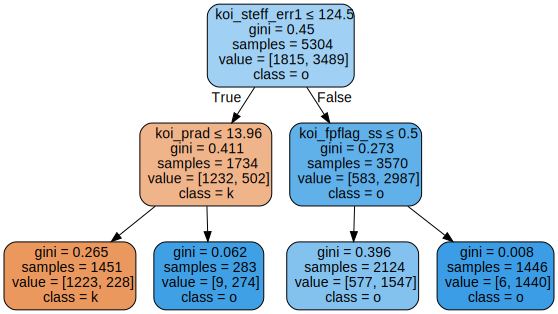

In [25]:
#visualize the tree
#graphiz doesn't work for me
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=features,
                     class_names='koi_false_positive',
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render()
graph


In [26]:
model = tree.DecisionTreeClassifier(max_depth=4)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.975867
Precision Score: 0.988331
Recall Score: 0.974684
F1 Score: 0.981460
AUC Score: 0.987017


In [27]:
model = tree.DecisionTreeClassifier(max_depth=100)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.983409
Precision Score: 0.987342
Recall Score: 0.987342
F1 Score: 0.987342
AUC Score: 0.981636


In [28]:
from sklearn.model_selection import GridSearchCV

# The params is a dictionary.  
# Where the keys are the parameter, 
# and the values are lists of parameter settings to try as values.
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 7, 100], 
    'min_samples_split': [2, 10, 20, 100],
    'min_samples_leaf': [1, 10, 20, 30],
         }

# Pass in an empty Decision Tree (empty excluding the random_state).
# The parameter dictionary
# and the scoring you want to optimize for. 
grid_search_cv =  GridSearchCV( 
    estimator = DecisionTreeClassifier(), 
    param_grid = params, 
    scoring = 'f1')


# Now, with one easy command, fit all combination of trees. 
grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_params_)

# This command gives you the best tree
model = grid_search_cv.best_estimator_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 100}


In [29]:
import sklearn
for i in sklearn.metrics.SCORERS.keys():
    print(i)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
top_k_accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


In [30]:
# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.989442
Precision Score: 0.986348
Recall Score: 0.997699
F1 Score: 0.991991
AUC Score: 0.992343


In [ ]:
#visualizing the best tree 
# dot_data = tree.export_graphviz(model, out_file=None, 
#                      feature_names=features,
#                      class_names=['koi_false_positive'],
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

In [33]:
# Now lets look at our feature importances
my_dict = {'feature_importance': model.feature_importances_,
           'feature':features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
29,0.302870,koi_steff_err1
2,0.275904,koi_fpflag_co
0,0.146960,koi_fpflag_nt
19,0.135895,koi_prad
3,0.076327,koi_fpflag_ec
1,0.057226,koi_fpflag_ss
6,0.003787,koi_period_err2
7,0.000335,koi_time0bk
37,0.000160,ra
32,0.000131,koi_slogg_err1
